**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
boston = load_boston()

X = pd.DataFrame(boston['data'], columns = boston['feature_names'])
y = pd.DataFrame(boston['target'], columns = ['Price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [3]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

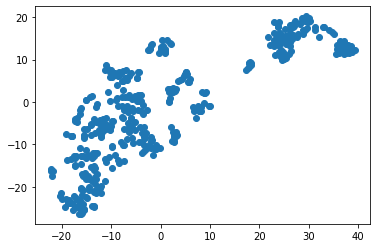

In [4]:
tsne = TSNE(n_components = 2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
#число признаков уменьшилось с 13 до 2

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


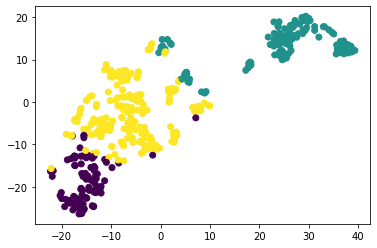

In [5]:
kmeans = KMeans(n_clusters = 3)
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [6]:
print('Медианы')
print(f'Фиолетовый кластер :{y_train[labels_train == 0].mean()}')
print(f'Желтый кластер : {y_train[labels_train == 1].mean()}')
print(f'Зеленый кластер : {y_train[labels_train == 2].mean()}')

Медианы
Фиолетовый кластер :Price    27.788372
dtype: float64
Желтый кластер : Price    16.165354
dtype: float64
Зеленый кластер : Price    24.958115
dtype: float64


In [7]:
print('Крим')
print(f'Фиолетовый кластер :{ X_train["CRIM"][labels_train == 0].mean() }')
print(f'Желтый кластер : { X_train["CRIM"][labels_train == 1].mean()}')
print(f'Зеленый кластер : { X_train["CRIM"][labels_train == 2].mean()}')

Крим
Фиолетовый кластер :0.07356558139534886
Желтый кластер : 10.797028425196853
Зеленый кластер : 0.42166020942408367


**Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


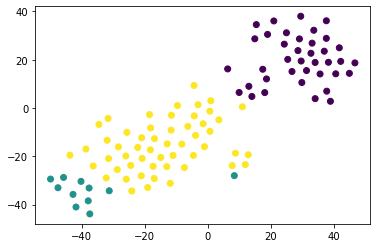

In [8]:
labels_test = kmeans.fit_predict(X_test_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [9]:
print('Крим')
print(f'Фиолетовый кластер :{ X_test["CRIM"][labels_test == 0].mean() }')
print(f'Желтый кластер : { X_test["CRIM"][labels_test == 1].mean()}')
print(f'Зеленый кластер : { X_test["CRIM"][labels_test == 2].mean()}')

Крим
Фиолетовый кластер :9.419181842105264
Желтый кластер : 0.04180181818181819
Зеленый кластер : 0.22580830188679243


In [10]:
print('Медианы')
print(f'Фиолетовый кластер :{y_test[labels_test == 0].mean()}')
print(f'Желтый кластер : {y_test[labels_test == 1].mean()}')
print(f'Зеленый кластер : {y_test[labels_test == 2].mean()}')

Медианы
Фиолетовый кластер :Price    16.710526
dtype: float64
Желтый кластер : Price    34.236364
dtype: float64
Зеленый кластер : Price    22.267925
dtype: float64
